<a href="https://colab.research.google.com/github/NantoCaparachin/Analisis_Descriptivos/blob/main/email_Eu_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
##overlap = [name for name in mcolors.CSS4_COLORS if f'xkcd:{name}' in mcolors.XKCD_COLORS]
##overlap ### para tener una lista de colores 

1. Cargar los datos en un grafo networkx

In [109]:
import pandas as pd 
import numpy as np 
import networkx as nx
import os
import matplotlib.pyplot as plt
import plotly.express as px
from  community import community_louvain

import warnings
warnings.filterwarnings('ignore')

In [110]:
target_path = open("email-Eu-core.txt")
g = nx.read_edgelist(target_path, 
                     nodetype=int)

2. ¿Cuántas cuentas de correo y conexiones están representadas en el gráfico?

In [111]:
print(len(g.nodes))
print(len(g.edges))

1005
16706


In [112]:
comunidades = community_louvain.best_partition(g)

3. Calcular la modularidad de este grafo con el método de Louvain, ¿cuántas grupo según su modularidad hay?

In [113]:
print(f"La modularidad es de: {community_louvain.modularity(comunidades, g):.2f}"  )
print(f"La cantidad de comunidades es: {len(set(comunidades.values())):,}")

La modularidad es de: 0.43
La cantidad de comunidades es: 27


4. Calcular el Page Rank de este grafo, ¿cuáles son las cuentas más importantes según su PageRank?

In [133]:
pagerank = nx.pagerank(g)
print(pagerank)

{0: 0.0012241295199045864, 1: 0.0014259510042902283, 2: 0.00260463482818408, 3: 0.0018332174392173863, 4: 0.0025264401879905776, 5: 0.004914163734511238, 6: 0.003145906944197701, 7: 0.0020020944919277666, 8: 0.0010592986261601348, 9: 0.001202557796628001, 10: 0.0013026316608832494, 11: 0.002064338143998903, 12: 0.001715064328163427, 13: 0.004589938693459019, 14: 0.0021662685314650394, 15: 0.0014574672416746283, 16: 0.00186960786301669, 17: 0.0027676670389268194, 18: 0.0015312949343487745, 19: 0.0018905950987648935, 20: 0.0020319570887596845, 21: 0.0036625451132120458, 22: 0.0004991589881118159, 23: 0.002035800977072181, 24: 0.0012121974705968101, 25: 0.0009039206582156919, 26: 0.0009491583327602047, 27: 0.00171251934688377, 28: 0.002587629010465832, 29: 0.001492448569633864, 30: 0.0017208445060822985, 31: 0.0012547965824590683, 32: 0.0009272290903036942, 33: 0.0008380148350899164, 34: 0.000839373575533886, 35: 0.0015023415677683873, 36: 0.0011462913715729558, 37: 0.0010196418506762664,

In [134]:
import operator

pagerank_ordenado = sorted(pagerank.items(), key=operator.itemgetter(1), reverse=True)
print(pagerank_ordenado[:5])

[(160, 0.009070948495026508), (121, 0.006068785425631803), (82, 0.0060307053368408095), (107, 0.005838096043249359), (86, 0.005721519612322318)]


Degree Centrality

In [147]:
degress = dict(g.degree())

In [148]:
ranks = [(k,v) for k,v in sorted(degress.items(),key=lambda item:-item[1])]
ranks[:5]

[(160, 347), (121, 234), (82, 233), (107, 221), (86, 218)]

Closeness centrality

In [142]:
closeness = nx.closeness_centrality(g)

In [143]:
ranks = [(k,v) for k,v in sorted(closeness.items(), key=lambda item:-item[1])]
ranks[:5]

[(160, 0.5738477207559312),
 (82, 0.5341954459662731),
 (121, 0.5312586925524948),
 (107, 0.5237721201913215),
 (62, 0.5226390274488848)]

Betweenness Centrality

In [149]:
betweenness = nx.betweenness_centrality(g)

In [151]:
ranks = [(k,v) for k,v in sorted(betweenness.items(), key=lambda item:-item[1])]
ranks[:5]

[(160, 0.08741473493638795),
 (86, 0.03778853269115196),
 (5, 0.030994686545277747),
 (82, 0.027880741135114222),
 (121, 0.027841538825800698)]

{0: 8, 1: 8, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 2, 13: 4, 14: 7, 15: 6, 16: 3, 17: 8, 18: 8, 19: 2, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 7, 42: 3, 43: 2, 44: 2, 45: 6, 46: 6, 47: 4, 48: 4, 49: 3, 50: 3, 51: 7, 52: 14, 53: 7, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 14, 61: 14, 62: 3, 63: 1, 64: 7, 65: 7, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 8, 74: 8, 75: 4, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 8, 86: 7, 87: 3, 88: 1, 89: 1, 90: 3, 91: 3, 92: 3, 93: 4, 94: 7, 95: 7, 96: 4, 97: 6, 98: 6, 99: 6, 100: 6, 101: 6, 102: 1, 103: 14, 104: 14, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 4, 116: 4, 117: 3, 118: 3, 119: 4, 120: 8, 121: 3, 122: 14, 123: 4, 124: 6, 125: 6, 126: 1, 127: 3, 128: 7, 129: 7, 130: 14, 131: 1, 132: 1, 133: 4, 134: 3, 135: 4, 136: 4, 137: 1

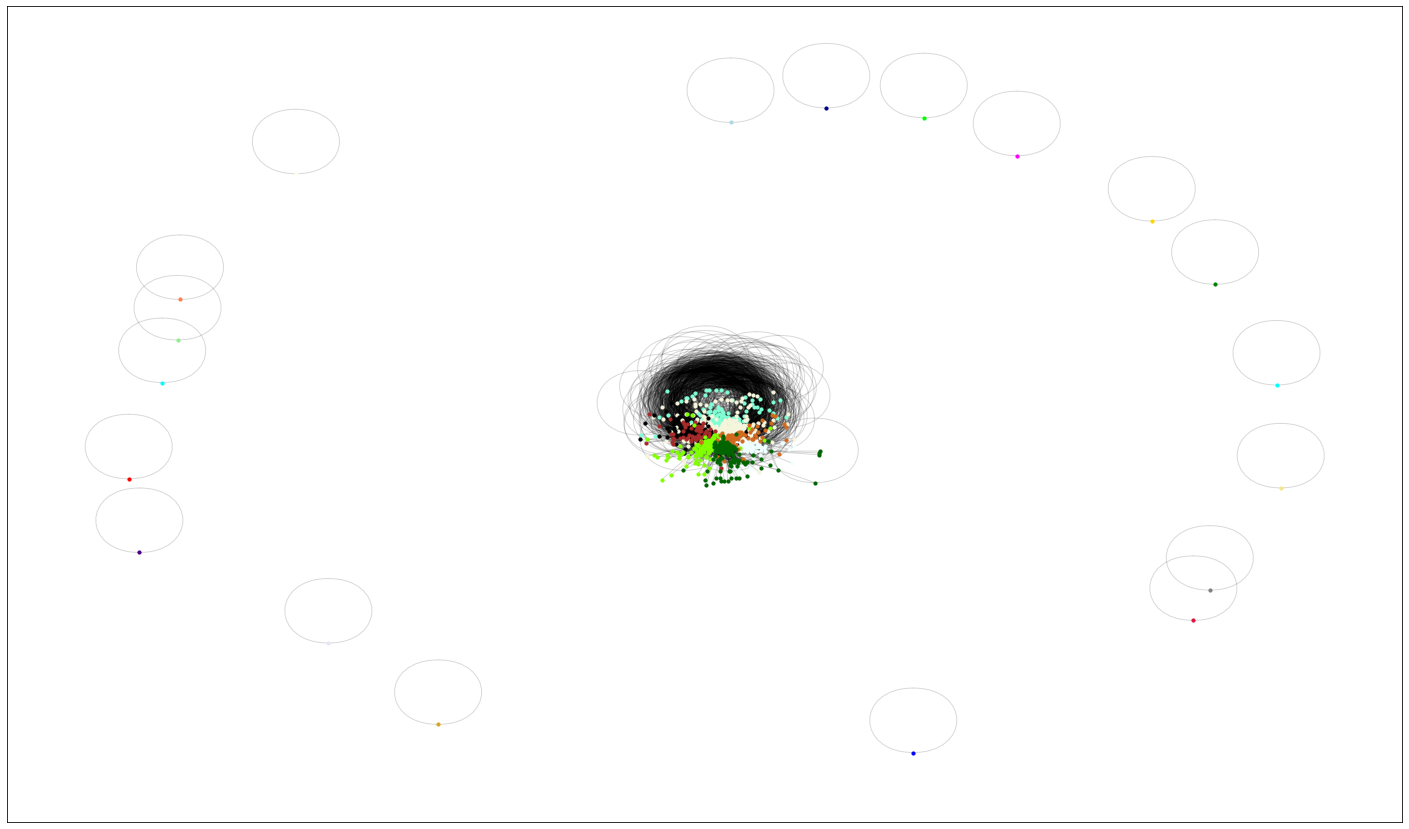

In [117]:
print(comunidades)

plt.figure(figsize=(25,15))

color = ['aqua',  'aquamarine',  'azure',  'beige',  'black',  'blue',  'brown',  'chartreuse',  'chocolate',  'coral',  'crimson',  'cyan',  "red",
         'darkblue',  'darkgreen',  'fuchsia',  'gold',  'goldenrod',  'green',  'grey',  'indigo',  'ivory', 'khaki',  'lavender',  'lightblue',  'lightgreen',  'lime']

pos = nx.spring_layout(g)

i = 0
for com in set(comunidades.values()):
  list_nodes = [nodo for nodo in comunidades if comunidades[nodo]==com]
  nx.draw_networkx_nodes(g, pos, list_nodes, node_size=10, node_color=color[i])
  i += 1
nx.draw_networkx_edges(g,pos,alpha=0.15)
plt.show()


In [131]:
print(comunidades)
communities = {c:[] for c in set(comunidades.values())}
print(communities)
#recorrer las comunidades para agregar cada aeropuerto a su id respectivo
for k in comunidades:
  communities[comunidades[k]].append(k)
for c in communities:
  print(c, communities[c])

{0: 8, 1: 8, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 2, 13: 4, 14: 7, 15: 6, 16: 3, 17: 8, 18: 8, 19: 2, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 7, 42: 3, 43: 2, 44: 2, 45: 6, 46: 6, 47: 4, 48: 4, 49: 3, 50: 3, 51: 7, 52: 14, 53: 7, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 14, 61: 14, 62: 3, 63: 1, 64: 7, 65: 7, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 8, 74: 8, 75: 4, 76: 4, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 8, 86: 7, 87: 3, 88: 1, 89: 1, 90: 3, 91: 3, 92: 3, 93: 4, 94: 7, 95: 7, 96: 4, 97: 6, 98: 6, 99: 6, 100: 6, 101: 6, 102: 1, 103: 14, 104: 14, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 4, 116: 4, 117: 3, 118: 3, 119: 4, 120: 8, 121: 3, 122: 14, 123: 4, 124: 6, 125: 6, 126: 1, 127: 3, 128: 7, 129: 7, 130: 14, 131: 1, 132: 1, 133: 4, 134: 3, 135: 4, 136: 4, 137: 1

In [132]:
for com in communities:
  sg = nx.subgraph(g, communities[com])
  p = community_louvain.best_partition(sg)
  print(com, community_louvain.modularity(p,sg),[g[a] for a in communities[com]])

0 0.0 [AtlasView({732: {}})]
1 0.3011631595816354 [AtlasView({3: {}, 4: {}, 192: {}, 281: {}, 195: {}, 305: {}, 2: {}, 412: {}, 102: {}, 194: {}, 55: {}, 252: {}, 13: {}, 63: {}, 586: {}, 408: {}, 138: {}, 434: {}, 6: {}, 58: {}, 114: {}, 193: {}, 174: {}, 285: {}, 5: {}, 137: {}, 323: {}, 211: {}, 238: {}, 520: {}, 635: {}, 481: {}, 665: {}, 59: {}, 208: {}, 506: {}, 516: {}, 517: {}, 160: {}, 286: {}, 57: {}, 132: {}, 162: {}, 409: {}, 411: {}, 587: {}, 140: {}, 96: {}, 64: {}, 809: {}, 826: {}, 158: {}, 738: {}, 832: {}, 273: {}, 803: {}, 845: {}, 571: {}, 89: {}, 54: {}, 599: {}, 300: {}, 489: {}, 612: {}, 564: {}, 249: {}, 865: {}, 166: {}, 283: {}, 107: {}, 494: {}, 62: {}, 880: {}, 698: {}, 899: {}, 86: {}, 886: {}, 546: {}, 812: {}, 164: {}, 859: {}, 308: {}, 131: {}, 56: {}, 126: {}, 333: {}, 971: {}, 271: {}, 990: {}, 685: {}, 651: {}, 896: {}, 405: {}, 1001: {}}), AtlasView({2: {}, 4: {}, 63: {}, 3: {}, 174: {}, 408: {}, 58: {}, 175: {}, 114: {}, 192: {}, 303: {}, 56: {}, 28

comunidad 0 : 1
comunidad 1 : 147
comunidad 2 : 95
comunidad 3 : 251
comunidad 4 : 111
comunidad 5 : 1
comunidad 6 : 56
comunidad 7 : 131
comunidad 8 : 76
comunidad 9 : 1
comunidad 10 : 1
comunidad 11 : 1
comunidad 12 : 1
comunidad 13 : 1
comunidad 14 : 119
comunidad 15 : 1
comunidad 16 : 1
comunidad 17 : 1
comunidad 18 : 1
comunidad 19 : 1
comunidad 20 : 1
comunidad 21 : 1
comunidad 22 : 1
comunidad 23 : 1
comunidad 24 : 1
comunidad 25 : 1
comunidad 26 : 1


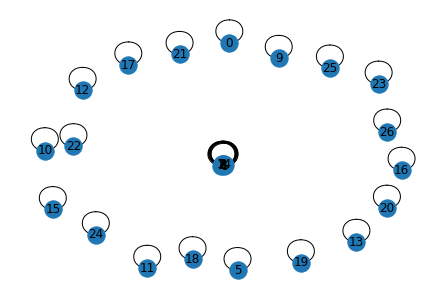

In [119]:
g_inducido = community_louvain.induced_graph(comunidades,g)
nx.draw(g_inducido,with_labels=True)

for i in range (len(set(comunidades.values()))):
  print(f"La comunidad {i} tiene: {len([nodo for nodo in comunidades if comunidades[nodo] == i])}, ademas su {} , "Su modularidad")
  print(f"La modularidad es de: {i} {community_louvain.modularity(comunidades, g):.2f}"  )
  print(f"La cantidad de comunidades es: {len(set(comunidades.values())):,}")


In [120]:
comunidad_3 = dict(filter(lambda x: x[1] == 3, comunidades.items())) ##diccionario
len(comunidad_3)

251

In [ ]:
g.nodes()
#odeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 7

In [124]:
list_3 = [nodo for nodo in comunidades if g[nodo] == 3]             ##lista de nodos

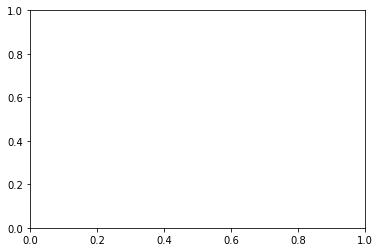

In [126]:
nx.draw_networkx_nodes(g, pos, nodelist=list_3, node_color='red', node_size=1000,alpha=.5)

In [122]:
grafo_0 = [u for u in g.nodes() if s[u] == list_3]

NameError: ignored

In [ ]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(comunidad_0,pos,node_color="darkgreen")
nx.draw_networkx_edges(comunidad_0,pos,alpha=0.25)

plt.show()